In [67]:
#Liberías visualización y datos
import seaborn as sns
import pandas as pd 
import numpy as np
#Librerías muestreos
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#Librerias Modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv ("dataset_Caso_1.csv",sep = ',')

In [3]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0
...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,QKP,MZBER,0,0,3,-2.5,0
1996,106.2410,-294.7023,XJB,YEQA,0,0,3,-2.5,0
1997,127.0572,-295.2308,SAT,MZBER,0,0,3,-5.5,0
1998,114.4653,-290.3312,LCV,MZBER,0,0,3,-5.5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [5]:
df.describe()

,x1,x2,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,101.074885,-298.282145,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,0.00000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.00000,1.000000,8.000000,-1.500000,1.000000


In [6]:
df['x3'].value_counts()

LCV    926
SAT    715
XJB    280
QKP     79
Name: x3, dtype: int64

In [7]:
df['x4'].value_counts()

MZBER    1918
YEQA       41
PQKE       36
ZUQF        5
Name: x4, dtype: int64

In [8]:
df['target'].value_counts()

0    1978
1      22
Name: target, dtype: int64

# Lo primero que notamos es que nuestro dataframe contaría con 9 columnas, 8 que serán nuestros regresores para predecir la etiqueta de la columna "target"

# Lo segundo sería notar que nuestro modelo cuenta con dos columnas con datos categoricos que vamos a codificar, para trabajarlo como variables numericas

# Lo tercero es notar el desiquilibro de clases de la columna target a predecir con 1978 etiquetas con valor "0" y 22 etiquetas de valor "1"

In [9]:
df_codificado = pd.get_dummies(df, columns = ['x3', 'x4'])

In [10]:
df_codificado = df_codificado.reindex(columns=['x1', 'x2', 'x3_LCV', 'x3_QKP',
       'x3_SAT', 'x3_XJB', 'x4_MZBER', 'x4_PQKE', 'x4_YEQA', 'x4_ZUQF','x5', 'x6', 'x7', 'x8', 'target'])
df_codificado

,x1,x2,x3_LCV,x3_QKP,x3_SAT,x3_XJB,x4_MZBER,x4_PQKE,x4_YEQA,x4_ZUQF,x5,x6,x7,x8,target
0,50.1341,-326.0000,0,0,1,0,1,0,0,0,0,0,6,-6.5,0
1,50.1341,-326.0000,0,0,1,0,1,0,0,0,0,0,6,-4.5,0
2,124.3276,-275.1935,1,0,0,0,1,0,0,0,0,0,3,-2.5,0
3,50.1341,-326.0000,0,0,1,0,1,0,0,0,0,0,3,-4.5,0
4,85.3905,-298.8632,0,0,0,1,1,0,0,0,0,0,5,-4.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,0,1,0,0,1,0,0,0,0,0,3,-2.5,0
1996,106.2410,-294.7023,0,0,0,1,0,0,1,0,0,0,3,-2.5,0
1997,127.0572,-295.2308,0,0,1,0,1,0,0,0,0,0,3,-5.5,0
1998,114.4653,-290.3312,1,0,0,0,1,0,0,0,0,0,3,-5.5,0


# Generación del modelo con sobremuestreo

In [11]:
x = df_codificado.drop("target", axis=1)
y = df_codificado["target"]
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x, y)
df_sobre = pd.concat([x_resampled, y_resampled], axis=1)

In [12]:
df_sobre['target'].value_counts()

0    1978
1    1978
Name: target, dtype: int64

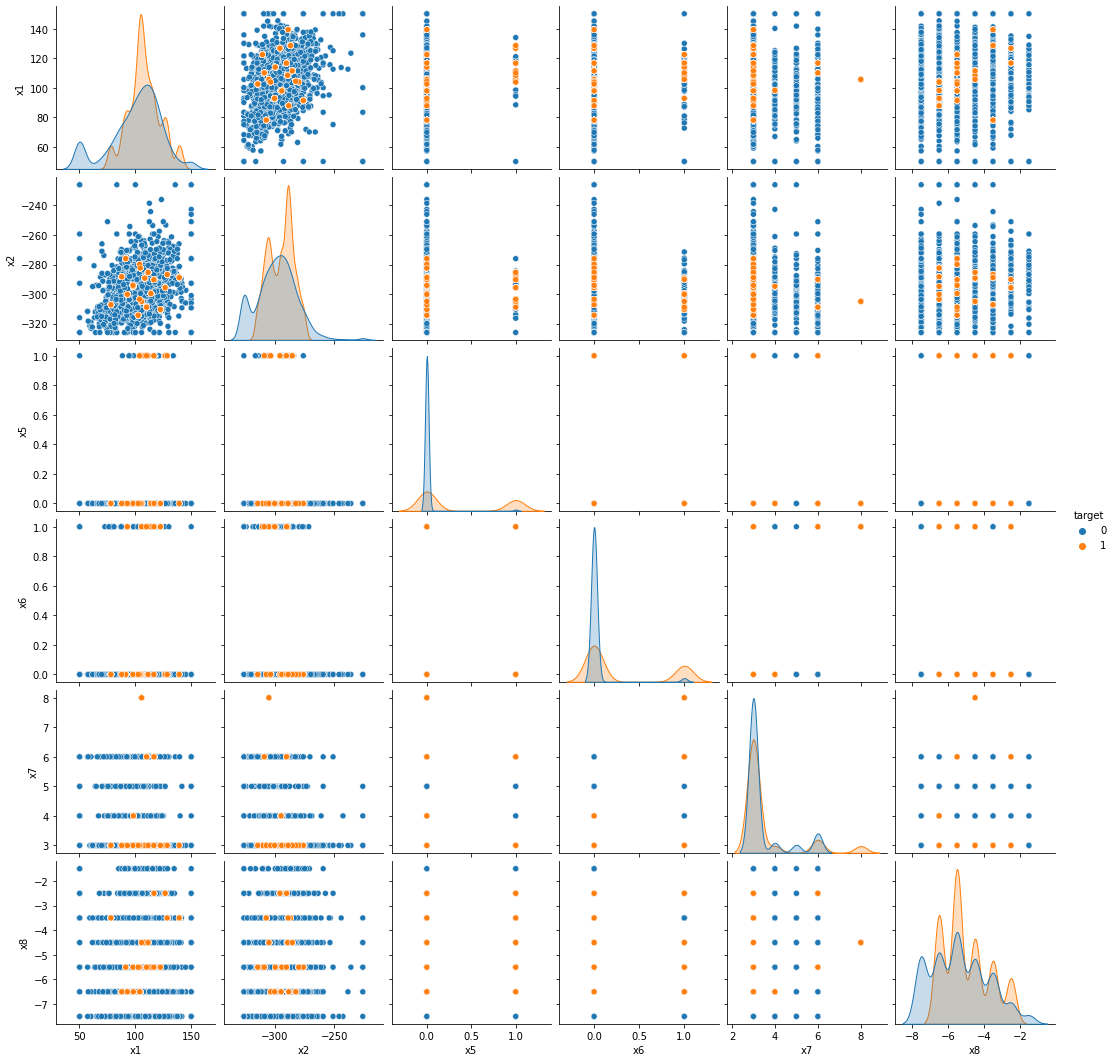

In [86]:
sns.pairplot(df_sobre.drop(['x3_LCV', 'x3_QKP',
       'x3_SAT', 'x3_XJB', 'x4_MZBER', 'x4_PQKE', 'x4_YEQA', 'x4_ZUQF'], axis=1), hue="target")

In [13]:
df_sobre

,x1,x2,x3_LCV,x3_QKP,x3_SAT,x3_XJB,x4_MZBER,x4_PQKE,x4_YEQA,x4_ZUQF,x5,x6,x7,x8,target
0,50.1341,-326.0000,0,0,1,0,1,0,0,0,0,0,6,-6.5,0
1,50.1341,-326.0000,0,0,1,0,1,0,0,0,0,0,6,-4.5,0
2,124.3276,-275.1935,1,0,0,0,1,0,0,0,0,0,3,-2.5,0
3,50.1341,-326.0000,0,0,1,0,1,0,0,0,0,0,3,-4.5,0
4,85.3905,-298.8632,0,0,0,1,1,0,0,0,0,0,5,-4.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,110.1341,-308.8571,0,0,1,0,1,0,0,0,1,1,6,-5.5,1
3952,116.6925,-290.2857,0,0,0,1,1,0,0,0,1,0,3,-5.5,1
3953,139.3903,-288.8099,1,0,0,0,1,0,0,0,0,0,3,-3.5,1
3954,139.3903,-288.8099,1,0,0,0,1,0,0,0,0,0,3,-3.5,1


Se puede ver como generó el sobremuestro en los rangos donde se encontraba la etiqueta "1"

## Generación del modelo

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_sobre.iloc[:, 0:14], df_sobre['target'], test_size = 0.30, random_state=1234)

In [43]:
np.unique(y_test, return_counts=True) # se mantuvo el equilibrio en el test y en el train

(array([0, 1], dtype=int64), array([594, 593], dtype=int64))

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
knn_1 = KNeighborsClassifier(n_neighbors = 45)
knn_1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=45)

In [46]:
predictions_1 = knn_1.predict(X_test_scaled)
predictions_1

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [83]:
predictions_2 = knn_1.predict(X_train_scaled)


In [48]:
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       594
           1       0.86      1.00      0.93       593

    accuracy                           0.92      1187
   macro avg       0.93      0.92      0.92      1187
weighted avg       0.93      0.92      0.92      1187



In [70]:
print(classification_report(y_train, predictions_2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1384
           1       0.86      1.00      0.93      1385

    accuracy                           0.92      2769
   macro avg       0.93      0.92      0.92      2769
weighted avg       0.93      0.92      0.92      2769



In [64]:
auc_train = roc_auc_score(y_train, predictions_2)
auc_test = roc_auc_score(y_test, predictions_1)

In [65]:
print("AUC train:", auc_train)
print("AUC test:", auc_test)

AUC train: 0.921242774566474
AUC test: 0.92003367003367


In [68]:
f1_train = f1_score(y_train, predictions_2)
f1_test = f1_score(y_test, predictions_1)
print("F1-score train:", f1_train)
print("F1-score test:", f1_test)

F1-score train: 0.9270414993306559
F1-score test: 0.9258391881342701


# Generación del modelo con mezcla de muestreo

In [71]:
x = df_codificado.drop("target", axis=1)
y = df_codificado["target"]
ros = RandomOverSampler(sampling_strategy=0.5)
x_resampled, y_resampled = ros.fit_resample(x, y)
df_mezcla = pd.concat([x_resampled, y_resampled], axis=1)

In [72]:
df_mezcla['target'].value_counts()

0    1978
1     989
Name: target, dtype: int64

In [73]:
x = df_mezcla.drop("target", axis=1)
y = df_mezcla["target"]
ros = RandomUnderSampler()
x_resampled, y_resampled = ros.fit_resample(x, y)
df_mezcla = pd.concat([x_resampled, y_resampled], axis=1)

In [74]:
df_mezcla['target'].value_counts()

0    989
1    989
Name: target, dtype: int64

In [75]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_mezcla.iloc[:, 0:14], df_mezcla['target'], test_size = 0.30, random_state=1234)

In [76]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [77]:
knn_2 = KNeighborsClassifier(n_neighbors = 31)
knn_2.fit(X_train_scaled2, y_train2)

KNeighborsClassifier(n_neighbors=31)

In [78]:
predictions_1 = knn_2.predict(X_test_scaled2)
predictions_1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [79]:
predictions_2 = knn_1.predict(X_train_scaled2)
predictions_2

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [80]:
print(classification_report(y_test2, predictions_1))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       302
           1       0.82      1.00      0.90       292

    accuracy                           0.89       594
   macro avg       0.91      0.89      0.89       594
weighted avg       0.91      0.89      0.89       594



In [81]:
print(classification_report(y_train2, predictions_2))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       687
           1       0.86      1.00      0.93       697

    accuracy                           0.92      1384
   macro avg       0.93      0.92      0.92      1384
weighted avg       0.93      0.92      0.92      1384



In [82]:
auc_train = roc_auc_score(y_train2, predictions_2)
auc_test = roc_auc_score(y_test2, predictions_1)
print("AUC train:", auc_train)
print("AUC test:", auc_test)
f1_train = f1_score(y_train2, predictions_2)
f1_test = f1_score(y_test2, predictions_1)
print("F1-score train:", f1_train)
print("F1-score test:", f1_test)

AUC train: 0.9199417758369723
AUC test: 0.890728476821192
F1-score train: 0.9268617021276596
F1-score test: 0.8984615384615384


# Obtuvo mejores metricas solo una sobremuestra y no una mezcla de ambos metodos